In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from pylattica.core import BasicController, SynchronousRunner, SimulationState
from pylattica.structures.square_grid import MooreNbHoodBuilder, VonNeumannNbHood2DBuilder
from pylattica.discrete.state_constants import DISCRETE_OCCUPANCY
from pylattica.models.game_of_life import Maze, Anneal, Diamoeba, Seeds, Life, GameOfLifeController

# Life-like Cellular Automata

There are many variations on Conway's Game of Life which [Life-like Automata](https://conwaylife.com/wiki/Life-like_cellular_automaton). There are implementations of these in pylattica for your enjoyment.

In [18]:
from pylattica.discrete import PhaseSet
from pylattica.structures.square_grid.grid_setup import DiscreteGridSetup
from pylattica.visualization import SquareGridArtist2D, ResultArtist, DiscreteCellArtist

phases = PhaseSet(["dead", "alive"])
setup = DiscreteGridSetup(phases)
cell_artist = DiscreteCellArtist.from_phase_list(phases.phases)

#### Life

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 60.08it/s]


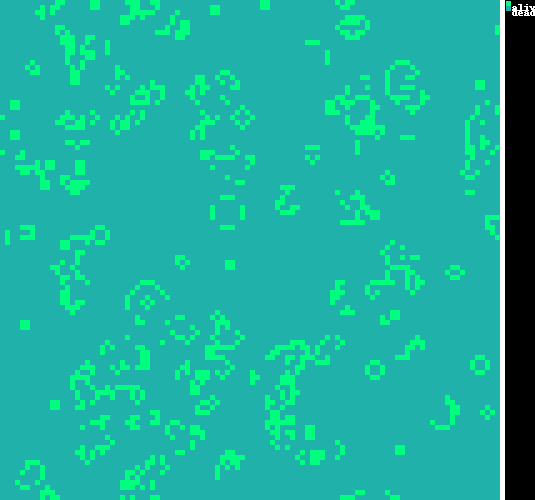

In [19]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Life)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)

In [29]:
ResultArtist(artist, result).to_gif("Life.gif", wait=0.2, cell_size=6)

#### Seeds

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 59.55it/s]


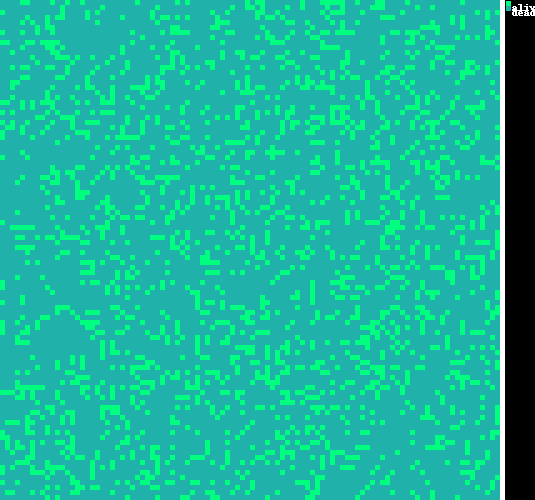

In [28]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Seeds)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Seeds.gif", wait=0.2, cell_size=6)

#### Diamoeba

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 58.76it/s]


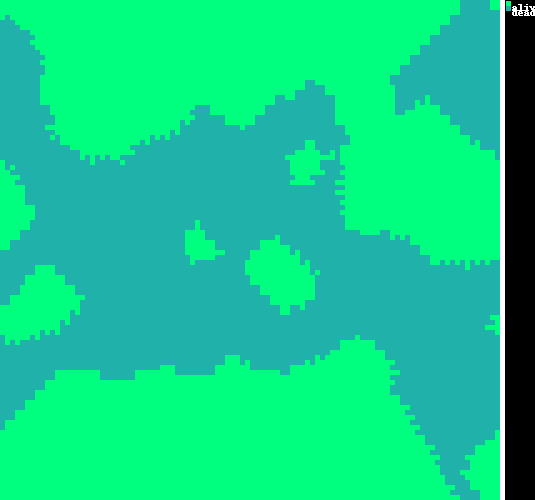

In [27]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Diamoeba)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Diamoeba.gif", wait=0.2, cell_size=6)

### Anneal

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 57.99it/s]


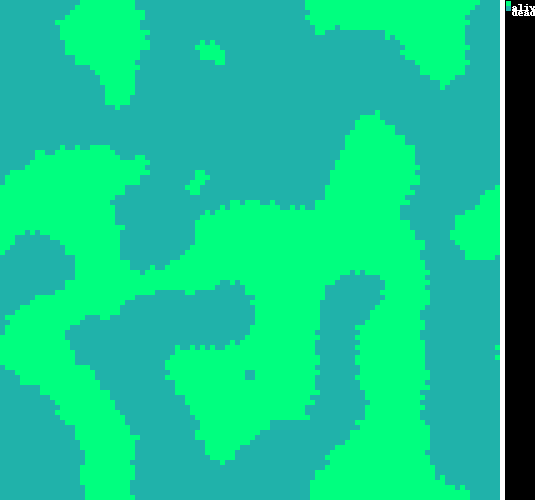

In [26]:
starting_state = setup.setup_noise(100, ["dead", "alive"])
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Anneal)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Anneal.gif", wait=0.2, cell_size=6)

### Maze

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 57.46it/s]


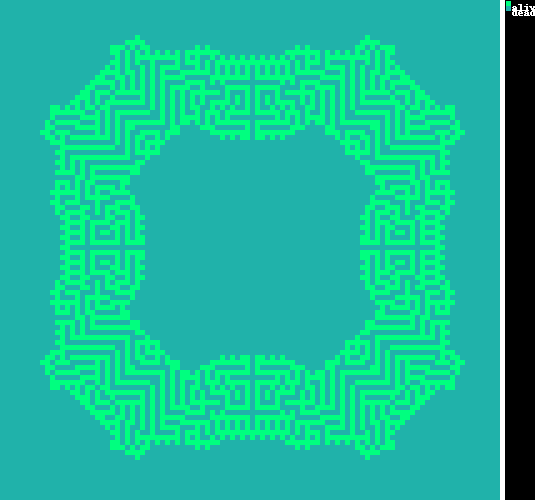

In [31]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, Maze)
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("Maze.gif", wait=0.2, cell_size=6)

### Other Lifes

You can specify any other life variant using the `Bxxx/Sxxx` syntax.

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 56.26it/s]


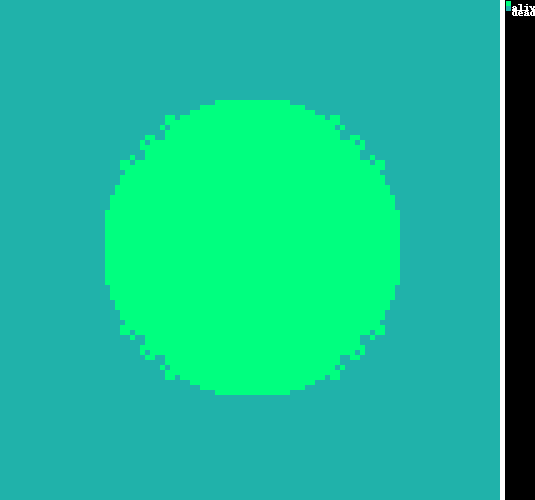

In [32]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
artist = SquareGridArtist2D(starting_state.structure, cell_artist)
controller = GameOfLifeController(starting_state.structure, variant="B3678/S34678")
runner = SynchronousRunner(parallel=True)
result = runner.run(starting_state.state, controller, 60, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
ResultArtist(artist, result).to_gif("daynnite.gif", wait=0.2, cell_size=6)

100%|█████████████████████████████████████████████| 150/150 [00:07<00:00, 20.32it/s]


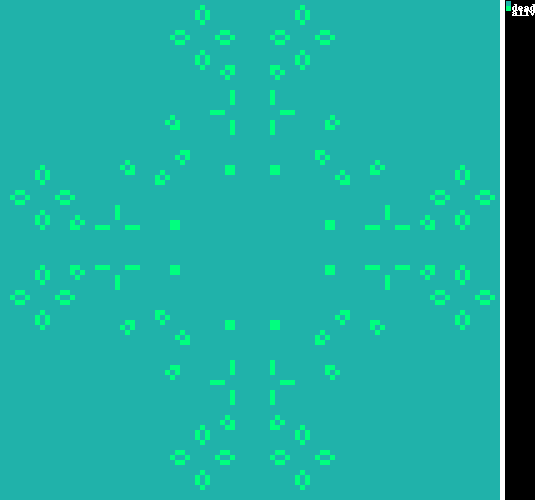

In [57]:
starting_state = setup.setup_particle(100, 30, "dead", "alive")
controller = GameOfLifeController(variant="B3/S238")
runner = Runner(parallel=True)
result = runner.run(starting_state.state, controller, 150, structure=starting_state.structure, verbose=False)
artist.jupyter_show(result.last_step, cell_size=5)
DiscreteSquareGridResultArtist(artist, result).to_gif("8life.gif", wait=0.2, cell_size=6)